<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/RE_YN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [4]:
plt.style.use('default')
plt.figure(figsize=(6,6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

##2D Reservoir Simulation 

###Case1
Less Grid Blocks

Source term (qsc) in Block 3,2: -400 STB/D
Block 2,2: 18.257399999999997 (p1,2 - p2,2) + 18.257399999999997 (p3,2 - p2,2) + 10.330833333333333 (p2,1 - p2,2) + 10.330833333333333 (p2,3 - p2,2) + (0)
Block 3,2: 18.257399999999997 (p2,2 - p3,2) + 18.257399999999997 (p4,2 - p3,2) + 10.330833333333333 (p3,1 - p3,2) + 10.330833333333333 (p3,3 - p3,2) + (-400)


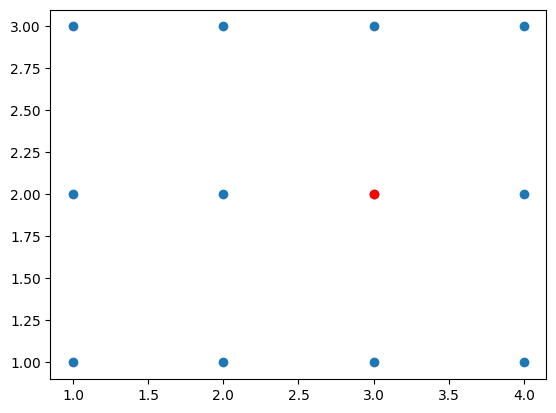

In [15]:
#Enter number of Grid blocks in X-D and Y-D
xi = 4 ; yi = 3

#Create blockwise coordinates as per Engg. Notation
x_c = np.arange(1,xi+1)
y_c = np.arange(1,yi+1)

x, y = np.meshgrid(x_c, y_c, indexing='ij')

#plot these grid points
plt.scatter(x,y)

# Note- Python starts indexing from 0. So, block 1,1 refers to [0,0], block 2,1
# refers to [1,0] and so on. In other words, block i,j refers to [i-1,j-1]

# define parameters, in this case blocks are homogeneous and same in size
dx = 250 # ft
dy = 300
dz = 100
kx = 270 # md
ky = 220
B = 1 # RB/STB
mu = 2 # cp

# assign all params to all blocks
dx = np.array([[dx]*yi]*xi)
dy = np.array([[dy]*yi]*xi)
dz = np.array([[dz]*yi]*xi)
kx = np.array([[kx]*yi]*xi)
ky = np.array([[ky]*yi]*xi)
B = np.array([[B]*yi]*xi)
mu = np.array([[mu]*yi]*xi)


# source term
xsc = 3; ysc = 2 # grid point (x and y coordinate) of the source 
q = -400 

qsc = np.array([[0]*yi]*xi) # initiate with zeros
qsc[xsc-1,ysc-1] = q # substitute the source to block 3,2

# plot the injected grid point, over the same canvas just 
#plot/replace the wellblock with red.
plt.scatter(x[xsc-1,ysc-1], y[xsc-1,ysc-1], color='red')


print('Source term (qsc) in Block {},{}: {} STB/D'. format(x[xsc-1,ysc-1], y[xsc-1,ysc-1], qsc[xsc-1,ysc-1]))


##########


for a, i, c in zip(range(0, xi-2), range(1, xi-1), range(2, xi)):
  for d, j, e in zip(range(0, yi-2), range(1, yi-1), range(2, yi)):
    Ax = dy[i,j] * dz[i,j]
    Ay = dx[i,j] * dz[i,j]

    # flow to x direction
    Tx_min = .001127 * (kx[i,j] * Ax) / (mu[i,j] * B[i,j] * dx[i,j])
    Tx_plus = Tx_min

    # flow to y direction
    Ty_min = .001127 * (ky[i,j] * Ay) / (mu[i,j] * B[i,j] * dy[i,j])
    Ty_plus = Ty_min 
 
    # flow equations for internal blocks.
    print('Block {},{}: {} (p{},{} - p{},{}) + {} (p{},{} - p{},{}) + {} (p{},{} - p{},{}) + {} (p{},{} - p{},{}) + ({})'.format(i+1, j+1, Tx_min, a+1, j+1, i+1, j+1, Tx_plus, c+1, j+1, i+1, j+1, Ty_min, i+1, d+1, i+1, j+1, Ty_plus, i+1, e+1, i+1, j+1, qsc[i,j]))


In [1]:
###########################################################################

###Case 2

'More Grid Blocks'

7X5 Block scene | Production in block 5,4

In [11]:
plt.style.use('default')
plt.figure(figsize=(6,6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Block 2,2: 18.257399999999997 (p1,2 - p2,2) + 18.257399999999997 (p3,2 - p2,2) + 10.330833333333333 (p2,1 - p2,2) + 10.330833333333333 (p2,3 - p2,2) + (0)
Block 2,3: 18.257399999999997 (p1,3 - p2,3) + 18.257399999999997 (p3,3 - p2,3) + 10.330833333333333 (p2,2 - p2,3) + 10.330833333333333 (p2,4 - p2,3) + (0)
Block 2,4: 18.257399999999997 (p1,4 - p2,4) + 18.257399999999997 (p3,4 - p2,4) + 10.330833333333333 (p2,3 - p2,4) + 10.330833333333333 (p2,5 - p2,4) + (0)
Block 3,2: 18.257399999999997 (p2,2 - p3,2) + 18.257399999999997 (p4,2 - p3,2) + 10.330833333333333 (p3,1 - p3,2) + 10.330833333333333 (p3,3 - p3,2) + (0)
Block 3,3: 18.257399999999997 (p2,3 - p3,3) + 18.257399999999997 (p4,3 - p3,3) + 10.330833333333333 (p3,2 - p3,3) + 10.330833333333333 (p3,4 - p3,3) + (0)
Block 3,4: 18.257399999999997 (p2,4 - p3,4) + 18.257399999999997 (p4,4 - p3,4) + 10.330833333333333 (p3,3 - p3,4) + 10.330833333333333 (p3,5 - p3,4) + (0)
Block 4,2: 18.257399999999997 (p3,2 - p4,2) + 18.257399999999997 (p5,2

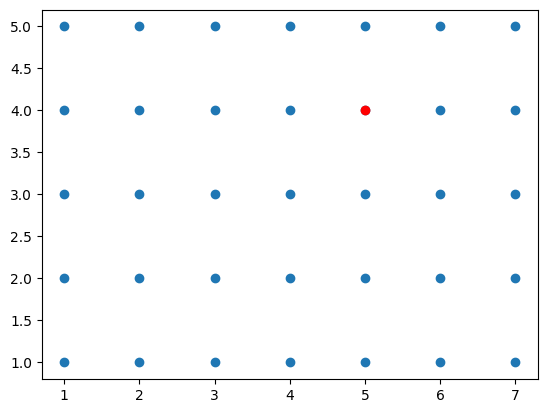

In [16]:
#1. No. of blocks in x and y
xi = 7 ; yi = 5

#2. Block coordinates (Given Block centered system)
x_c = np.arange(1,xi+1) # +1 because last term gets skipped
y_c = np.arange(1,yi+1) 

x,y = np.meshgrid(x_c,y_c,indexing='ij')

plt.scatter(x,y)

#3. define parameters, in this case blocks are homogeneous and same in size
dx = 250 # ft
dy = 300
dz = 100
kx = 270 # md
ky = 220
B = 1 # RB/STB
mu = 2 # cp


#4. assign all params to all blocks
dx = np.array([[dx]*yi]*xi)
dy = np.array([[dy]*yi]*xi)
dz = np.array([[dz]*yi]*xi)
kx = np.array([[kx]*yi]*xi)
ky = np.array([[ky]*yi]*xi)
B = np.array([[B]*yi]*xi)
mu = np.array([[mu]*yi]*xi)


#5. source term
xsc = 5; ysc = 4 # grid point (x and y coordinate) of the source 
q = -400 
qsc = np.array([[0]*yi]*xi) # initiate with zeros
qsc[xsc-1,ysc-1] = q # inject the source to block 5,4


# plot the well grid point
plt.scatter(x[xsc-1,ysc-1], y[xsc-1,ysc-1], color='red') 
# -1 because we are visualizing as per 1 indexing and python has a 0 indexing. 

#Displaying the equations.
for a, i, c in zip(range(0, xi-2), range(1, xi-1), range(2, xi)):
  for d, j, e in zip(range(0, yi-2), range(1, yi-1), range(2, yi)):
    Ax = dy[i,j] * dz[i,j]
    Ay = dx[i,j] * dz[i,j]

    # flow to x direction
    Tx_min = .001127 * (kx[i,j] * Ax) / (mu[i,j] * B[i,j] * dx[i,j])
    Tx_plus = Tx_min

    # flow to y direction
    Ty_min = .001127 * (ky[i,j] * Ay) / (mu[i,j] * B[i,j] * dy[i,j])
    Ty_plus = Ty_min 
 
    # flow equation
    print(f'Block {i+1},{j+1}: {Tx_min} (p{a+1},{j+1} - p{i+1},{j+1}) + {Tx_plus} (p{c+1},{j+1} - p{i+1},{j+1}) + {Ty_min} (p{i+1},{d+1} - p{i+1},{j+1}) + {Ty_plus} (p{i+1},{e+1} - p{i+1},{j+1}) + ({qsc[i,j]})')

In [17]:
#################################################################

#Case 3. Many Grid Blocks.

In [18]:
##To. Do.